<h1>Projeto 120 Anos de Olipíadas</h1>
<b>Por: Leandro S. Silva</b><br>
<i>Data: 02/2022</i>

<p>Este projeto engloba os dados de olipíadas realizadas nos últimos 120 anos.</p><br>

<b>Conteudo:</b><br>

<p>O arquivo atleta_events.csv contém 27.1116 linhas e 15 colunas; Cada linha corresponde a um atleta individual competindo em um evento olímpico individual (eventos-atleta). As colunas são as seguintes:</p>

Column |data type
------------|-----------
ID | Unique number for each athlete;
Name | Athlete's name;
Sex | M or F;
Age | Integer;
Height | In centimeters;
Weight | In kilograms;
Team | Team name;
NOC | National Olympic Committee 3-letter code;
Games | Year and season;
Year | Integer;
Season | Summer or Winter;
City | Host city;
Sport | Sport;
Event | Event;
Medal | Gold, Silver, Bronze, or NA.

<h2>Índice</h2>
<ol>
    <li>Importe de Módulos</li>
    <li>Importe de Dados</li>
    <li>Merge entre os dois datasets</li>
    <li>Higienizando a base</li>
    <li>Analise Exploratoria</li>
</ol>


# 1. Importe de Módulos

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir('base/'))

['noc_regions.csv', 'athlete_events.csv']


# 2. Importe de Dados

In [2]:
archives = os.listdir('base/')
datasets = {}

for archive in archives:
        datasets[archive[:-4]] = pd.read_csv(f'base/{archive}', encoding = 'UTF-8')

## 3. Merge entre os dois datasets

In [3]:
datasets['athlete_events'].shape, datasets['noc_regions'].shape

((271116, 15), (230, 3))

In [4]:
datasets['athlete_events'].head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [5]:
datasets['noc_regions'].head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [6]:
dataset = pd.merge(datasets['athlete_events'],datasets['noc_regions'], how ='left', on='NOC')

In [7]:
dataset.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

# 4. Higienizando a base

In [8]:
dataset = dataset.drop_duplicates()

In [9]:
#Dados nulos
dataset.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
notes     264696
dtype: int64

In [10]:
#Removendo Resgistros nulos em 'Weight', 'Height', 'Age'
dataset = dataset.dropna(axis=1, how='all')
dataset = dataset.dropna(subset=['Weight', 'Height', 'Age'])

# 5. Analise Exploratoria

In [11]:
dataset.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
print(f'Esportes distintos {len(dataset["Sport"].unique())}')
print(f'Regiões distintas {len(dataset["region"].unique())}')
print(f'Intervalo dos dados: {dataset["Year"].max()-dataset["Year"].min()} anos, {dataset["Year"].min()} até {dataset["Year"].max()}')

Esportes distintos 56
Regiões distintas 206
Intervalo dos dados: 120 anos, 1896 até 2016


In [13]:
dataset.describe()

,ID,Age,Height,Weight,Year
count,206152.000000,206152.000000,206152.000000,206152.000000,206152.00000
mean,68615.742981,25.054736,175.372056,70.688332,1989.67849
std,38996.980304,5.481679,10.545816,14.340633,20.12571
min,1.000000,11.000000,127.000000,25.000000,1896.00000
25%,35189.000000,21.000000,168.000000,60.000000,1976.00000
50%,68629.000000,24.000000,175.000000,70.000000,1992.00000
75%,102312.250000,28.000000,183.000000,79.000000,2006.00000
max,135571.000000,71.000000,226.000000,214.000000,2016.00000


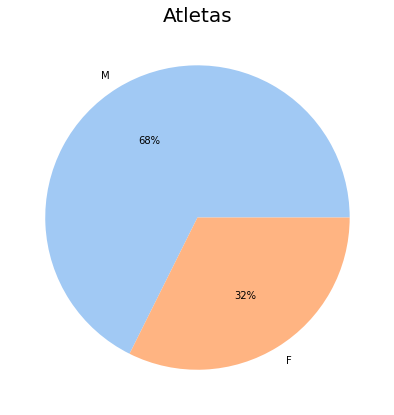

In [14]:
data = dataset['Sex'].value_counts(normalize=True)
labels = ['M', 'F']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


plt.figure(figsize=(7,7))

#create pie chart
plt.pie(data,  labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Atletas", fontsize=20);
plt.show()

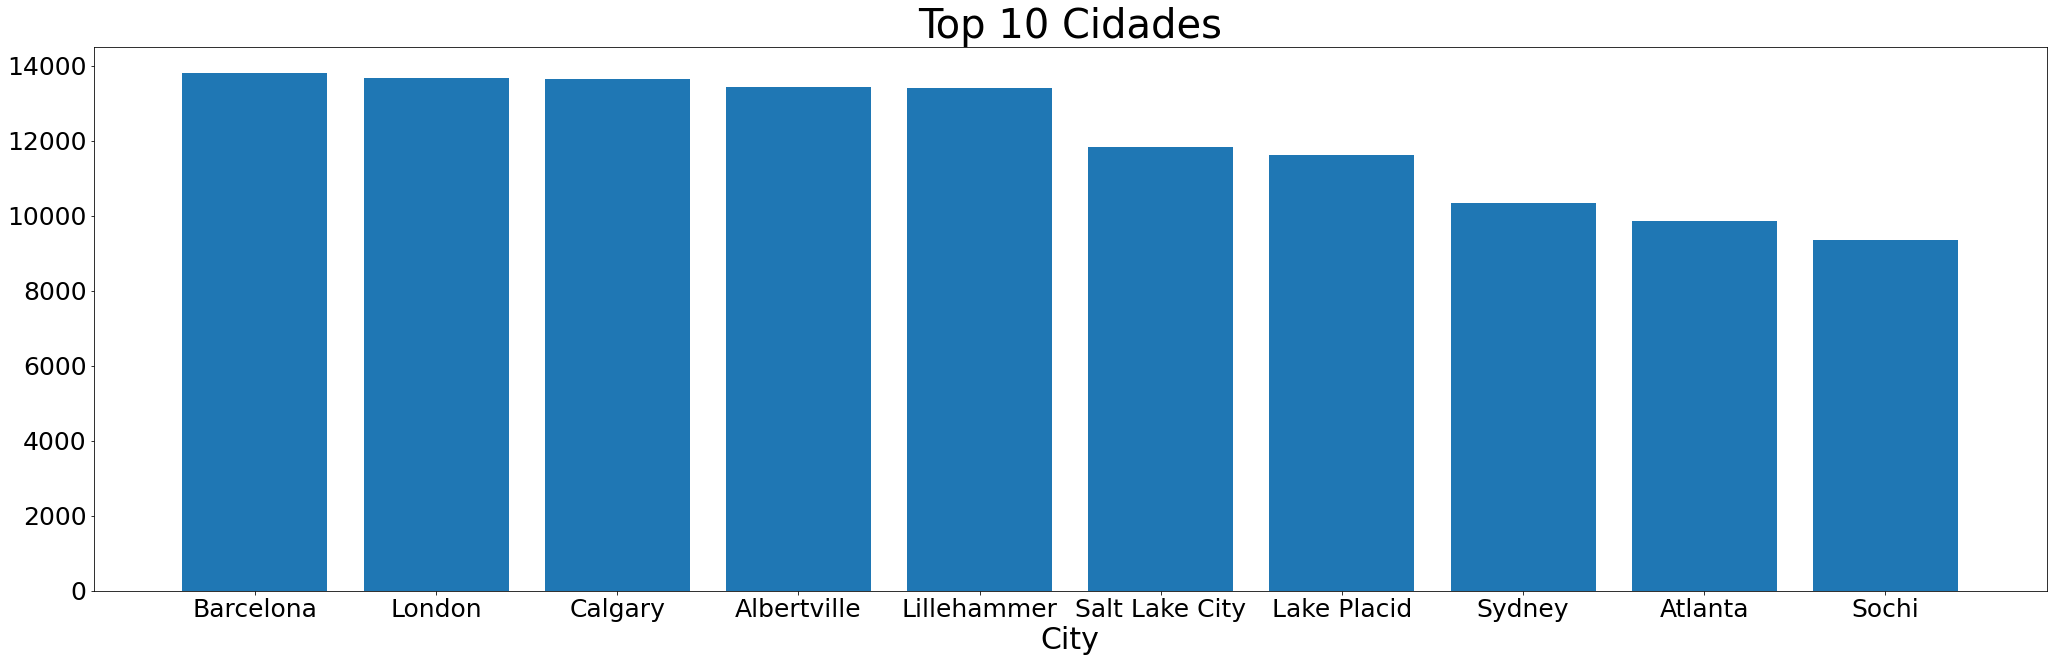

In [15]:
data = dataset['City'].value_counts().head(10)
labels = dataset['City'].unique()[:10]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


plt.figure(figsize=(35,10))

#create pie chart
plt.bar(  labels,data)
plt.title("Top 10 Cidades", fontsize=40);
plt.xlabel('City', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.show()

In [20]:
#
dataset.describe()

,ID,Age,Height,Weight,Year
count,206152.000000,206152.000000,206152.000000,206152.000000,206152.00000
mean,68615.742981,25.054736,175.372056,70.688332,1989.67849
std,38996.980304,5.481679,10.545816,14.340633,20.12571
min,1.000000,11.000000,127.000000,25.000000,1896.00000
25%,35189.000000,21.000000,168.000000,60.000000,1976.00000
50%,68629.000000,24.000000,175.000000,70.000000,1992.00000
75%,102312.250000,28.000000,183.000000,79.000000,2006.00000
max,135571.000000,71.000000,226.000000,214.000000,2016.00000


In [31]:
dataset['Weight'].sort_values(ascending=False).head(5)

23155     214.0
23156     214.0
205467    198.0
75031     190.0
237040    182.0
Name: Weight, dtype: float64

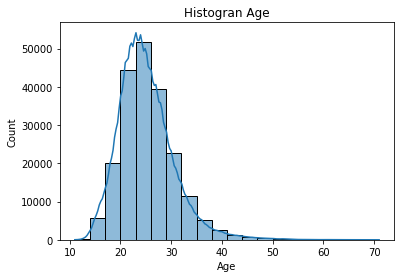

In [35]:
ax = sns.histplot(data=dataset, x="Age",bins=20, kde=True).set_title('Histogran Age')

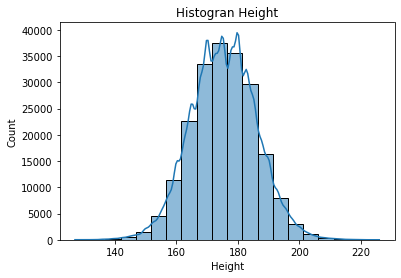

In [36]:
ax = sns.histplot(data=dataset, x="Height",bins=20, kde=True).set_title('Histogran Height')

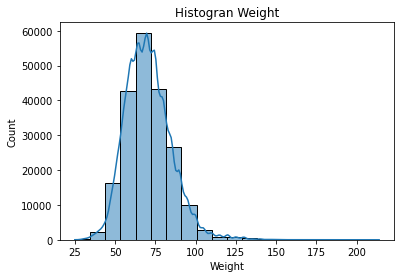

In [37]:
ax = sns.histplot(data=dataset, x="Weight",bins=20, kde=True).set_title('Histogran Weight')

In [41]:
dataset['Medal'].value_counts()

Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64

In [45]:
dataset[dataset['NOC']=='BRA']['Medal'].value_counts()

Bronze    172
Silver    168
Gold      107
Name: Medal, dtype: int64

In [51]:
dataset.groupby(['Medal','Sex'])[['Medal']].count()

Medal
Medal  Sex       
Bronze F     3475
       M     6673
Gold   F     3437
       M     6730
Silver F     3438
       M     6428

Index(['Bronze', 'Gold', 'Silver'], dtype='object', name='Medal')

In [71]:
ax = sns.barplot(x=dataset.groupby(['Medal','Sex'])[['Medal']].count().index, 
                 y="Medal", 
                 hue="Sex", data=dataset.groupby(['Medal','Sex'])[['Medal']].count())

ValueError: Could not interpret input 'Sex'